# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import scipy.optimize as optimize

import matplotlib.pyplot as plt
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

from FullHANKSAMModel import FullHANKSAMModelClass
from figures import create_fig, save_fig, vary_par, IRF_figs

# Setup

In [2]:
model = FullHANKSAMModelClass(name='baseline')
model.load_data()

In [3]:
par = model.par
ss = model.ss
path = model.path

In [4]:
varlist = [
    ('v','vacancy stock'),
    ('u','unemployment rate'),
    ('delta','separation rate'),
    ('theta','tightness'),
    ('lambda_u','job-finding-rate'),
    ('lambda_v','job-filling rate'),
    ('shock_TFP','TFP'),
    ('px','intermediary goods price'),
    ('R','nominal Interest rate'),
    ('Pi','inflation'),
    ('RealR','real interest rate'),
    ('q','price of government debt'),
    ('qB','value of government debt'),
    ('tau','tax rate'),
]

# SAM

In [5]:
SAM = model.copy(name='SAM')
SAM.par.var_u_target = 1.0

do_print = True
SAM.set_only_SAM()
SAM.find_ss(do_print=do_print)
SAM.compute_jacs(do_print=do_print,skip_hh=True,skip_shocks=True)
SAM.find_transition_path(do_print=do_print,do_end_check=False)
SAM.calibrate_to_var_u(do_print=do_print,do_full_print=do_print)

steady state found in 0.0 secs
full Jacobians:
full Jacobian to unknowns computed in 27.4 secs [in evaluate_path(): 26.6 secs]
finding the transition path:
 it =   0 -> max. abs. error = 5.83e-03
   5.83e-03 in errors_Vj
   2.78e-17 in errors_Vv
   1.39e-17 in errors_ut
   0.00e+00 in errors_vt
 it =   1 -> max. abs. error = 1.35e-03
   3.01e-05 in errors_Vj
   1.35e-03 in errors_Vv
   1.47e-05 in errors_ut
   7.26e-05 in errors_vt
 it =   2 -> max. abs. error = 8.17e-05
   2.15e-06 in errors_Vj
   8.17e-05 in errors_Vv
   1.05e-06 in errors_ut
   1.50e-05 in errors_vt
 it =   3 -> max. abs. error = 1.96e-05
   6.11e-08 in errors_Vj
   1.96e-05 in errors_Vv
   1.95e-07 in errors_ut
   5.11e-06 in errors_vt
 it =   4 -> max. abs. error = 2.19e-06
   4.49e-09 in errors_Vj
   2.19e-06 in errors_Vv
   2.97e-08 in errors_ut
   7.69e-07 in errors_vt
 it =   5 -> max. abs. error = 3.16e-07
   9.57e-10 in errors_Vj
   3.16e-07 in errors_Vv
   4.13e-09 in errors_ut
   2.04e-07 in errors_vt
 it 

In [6]:
print(f'{SAM.par.w_ss = :.2f}')

SAM.par.w_ss = 0.66


# Baseline

In [7]:
model.par.w_ss = SAM.par.w_ss

In [8]:
with open(f'saved/par_calibration.p', 'wb') as f:
    pickle.dump(model.par.__dict__, f)

In [9]:
model.find_ss(do_print=True)

guess:
     R =   0.97668498 -> B-A_hh =   0.65279085
find bracket to search in:
  0: R =   0.97793498 -> B-A_hh =   0.64837231
  1: R =   0.98980998 -> B-A_hh =   0.56287461
  2: R =   0.99574748 -> B-A_hh =   0.40583018
  3: R =   0.99871623 -> B-A_hh =   0.19481615
  4: R =   1.00020060 -> B-A_hh =  -0.01949659
brentq:
  0: R =   1.00006556 -> B-A_hh =   0.00651657
  1: R =   1.00009939 -> B-A_hh =   0.00015924
  2: R =   1.00010023 -> B-A_hh =  -0.00000007
  3: R =   1.00010023 -> B-A_hh =   0.00000000
  4: R =   1.00010023 -> B-A_hh =  -0.00000000

R =   1.00010023

steady state found in 26.6 secs


In [10]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
v              : t0 =  0.0e+00, max abs.  0.0e+00
u              : t0 = -6.9e-18, max abs.  6.9e-18
delta          : t0 =  0.0e+00, max abs.  0.0e+00
entry          : t0 =  0.0e+00, max abs.  0.0e+00
vt             : t0 =  0.0e+00, max abs.  0.0e+00
ut             : t0 =  0.0e+00, max abs.  0.0e+00
theta          : t0 =  0.0e+00, max abs.  0.0e+00
lambda_u       : t0 =  0.0e+00, max abs.  0.0e+00
lambda_v       : t0 =  0.0e+00, max abs.  0.0e+00
w              : t0 =  0.0e+00, max abs.  0.0e+00
M              : t0 =  0.0e+00, max abs.  0.0e+00
mu             : t0 = -3.5e-18, max abs.  3.5e-18
Vj             : t0 =  0.0e+00, max abs.  0.0e+00
Vv             : t0 =  0.0e+00, max abs.  0.0e+00
shock_TFP      : t0 =  0.0e+00, max abs.  0.0e+00
px             : t0 =  0.0e+00, max abs.  0.0e+00
R              : t0 =  0.0e+00, max abs.  0.0e+00
Pi             : t0

In [11]:
model.compute_jacs(do_print=True,skip_shocks=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for RealR_ex_post   in 1.0 secs
curly_Y and curly_D calculated for delta           in 1.1 secs
curly_Y and curly_D calculated for lambda_u        in 1.1 secs
curly_Y and curly_D calculated for phi_obar        in 1.1 secs
curly_Y and curly_D calculated for shock_beta      in 1.1 secs
curly_Y and curly_D calculated for tau             in 1.1 secs
curly_Y and curly_D calculated for transfer        in 1.1 secs
curly_Y and curly_D calculated for u_bar           in 1.1 secs
curly_Y and curly_D calculated for w               in 1.1 secs
curly_E calculated in 2.0 secs
builiding blocks combined in 0.3 secs
household Jacobian computed in 12.1 secs

full Jacobians:
full Jacobian to unknowns computed in 2.2 secs [in evaluate_path(): 0.9 secs]


In [12]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 5.83e-03
   5.83e-03 in errors_Vj
   2.78e-17 in errors_Vv
   0.00e+00 in errors_Pi
   1.89e-10 in errors_assets
   1.39e-17 in errors_ut
   0.00e+00 in errors_vt
   2.08e-16 in errors_U_UI
 it =   1 -> max. abs. error = 5.43e-03
   4.88e-04 in errors_Vj
   1.62e-03 in errors_Vv
   5.43e-03 in errors_Pi
   3.06e-05 in errors_assets
   5.18e-05 in errors_ut
   6.83e-04 in errors_vt
   2.50e-05 in errors_U_UI
 it =   2 -> max. abs. error = 5.17e-04
   1.93e-05 in errors_Vj
   3.97e-04 in errors_Vv
   2.70e-04 in errors_Pi
   5.49e-06 in errors_assets
   1.05e-06 in errors_ut
   5.17e-04 in errors_vt
   1.05e-06 in errors_U_UI
 it =   3 -> max. abs. error = 3.15e-04
   2.14e-05 in errors_Vj
   1.65e-04 in errors_Vv
   3.15e-04 in errors_Pi
   2.25e-06 in errors_assets
   4.75e-07 in errors_ut
   2.40e-04 in errors_vt
   5.90e-07 in errors_U_UI
 it =   4 -> max. abs. error = 1.63e-05
   1.63e-06 in errors_Vj
   7.04e-06 in errors_

In [13]:
model.calc_calib_moms(do_print=True)

w_share    = 79.0957
M_share    = 20.9043
var_u      =  1.3746
std_W      =  0.0000
timeshift  =  5.0000
EU_share   = 39.2718
C_drop_ss  = -19.2444
C_drop_ini_ss = -7.4970

data:
var_u      =  2.6497


## IRFs

In [14]:
model_flex = model.copy()
model_flex.par.phi = 0.001
model_flex.compute_jacs()
model_flex.find_transition_path()

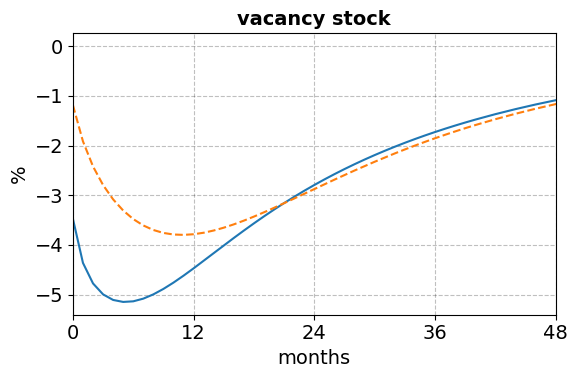

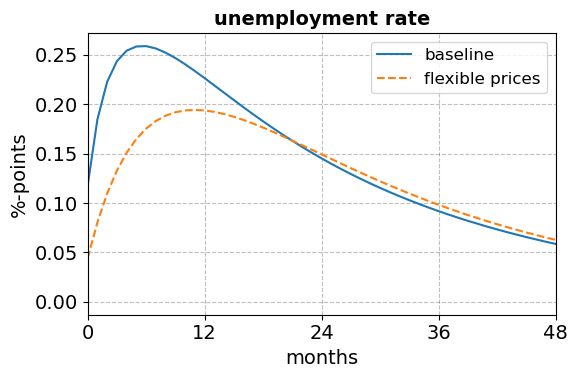

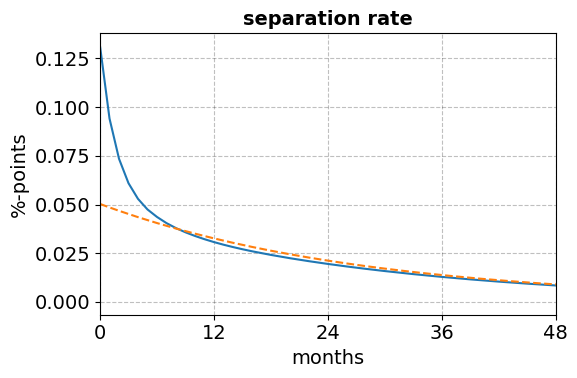

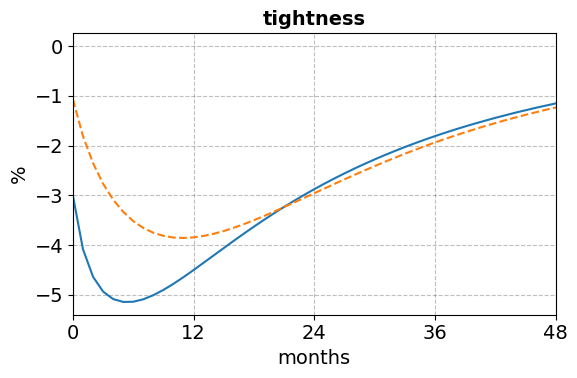

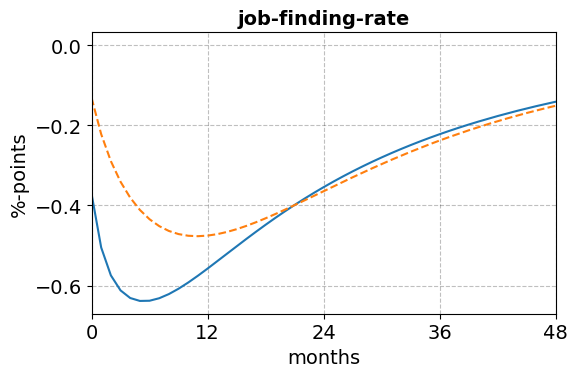

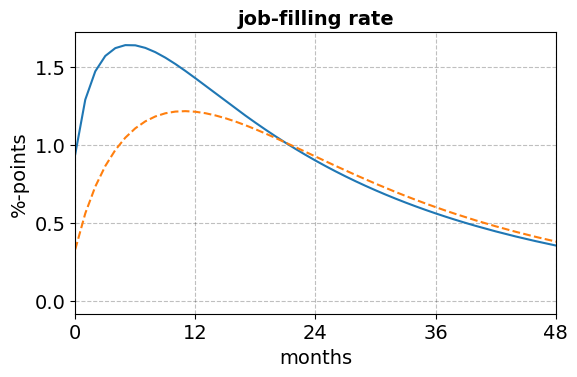

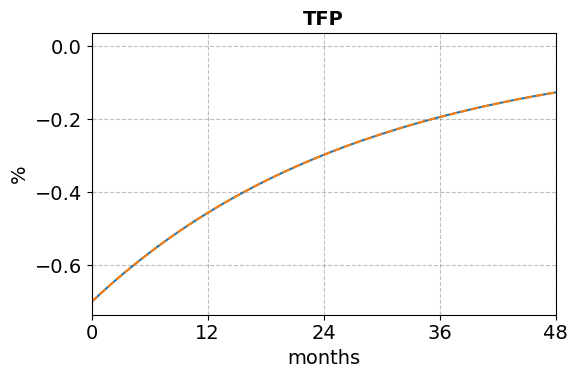

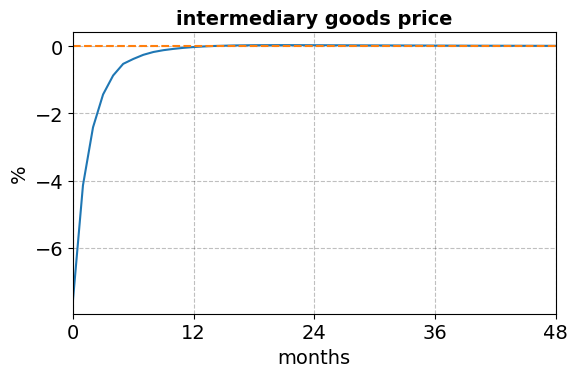

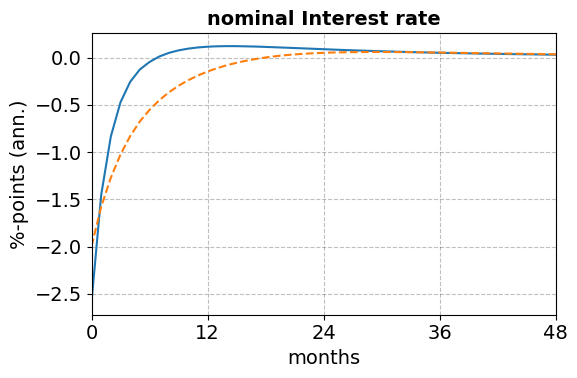

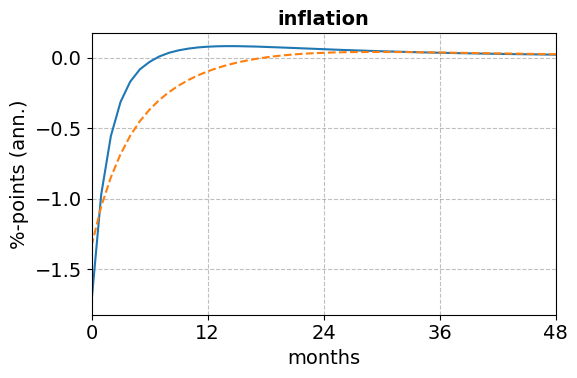

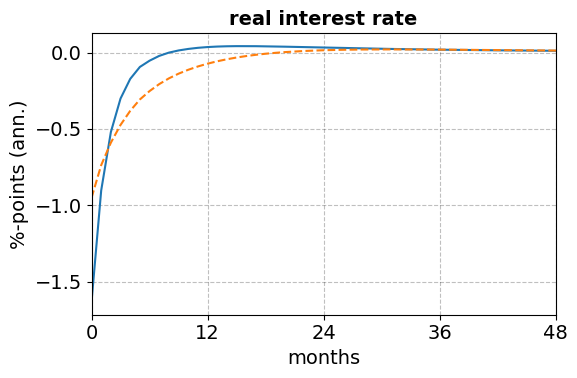

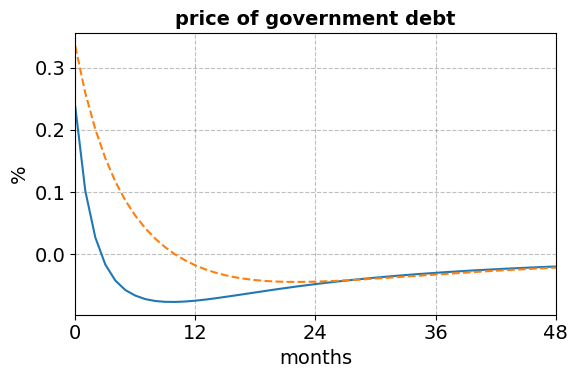

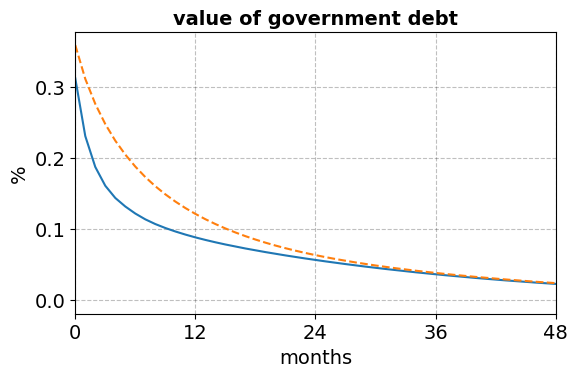

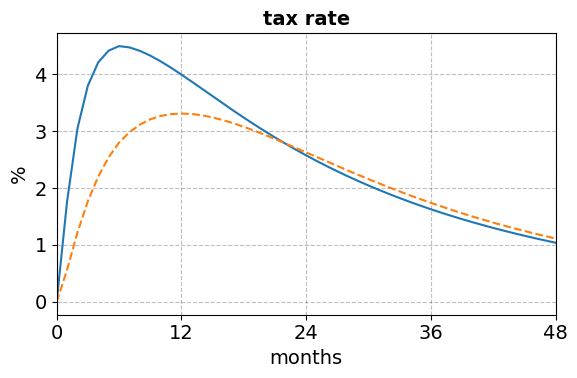

In [15]:
for varname,title in varlist:
    
    IRF,ylabel = model.get_IRF(varname)
    IRF_flex,_ = model_flex.get_IRF(varname)

    fig,ax = create_fig()    
    ax.plot(IRF,label='baseline')
    ax.plot(IRF_flex,ls='--',label='flexible prices')
    save_fig(fig,ax,
             filename=f'IRF_{varname}',
             title=title,
             legend=varname=='u',
             ylabel=ylabel) 

## SAM variations

baseline: psi = 1.0000
psi =  0.9000
psi =  1.0000
psi =  1.1000
completed in 14.3 secs


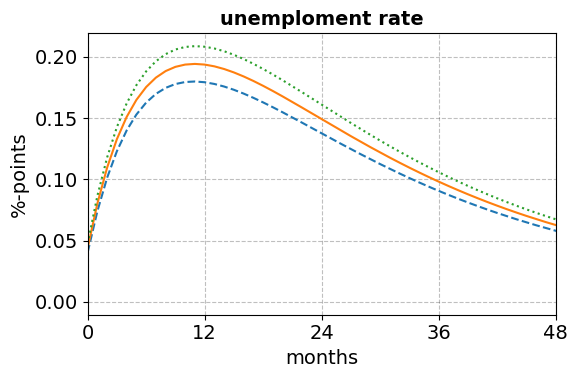

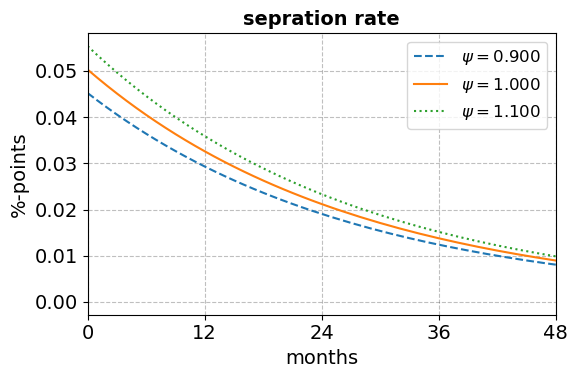

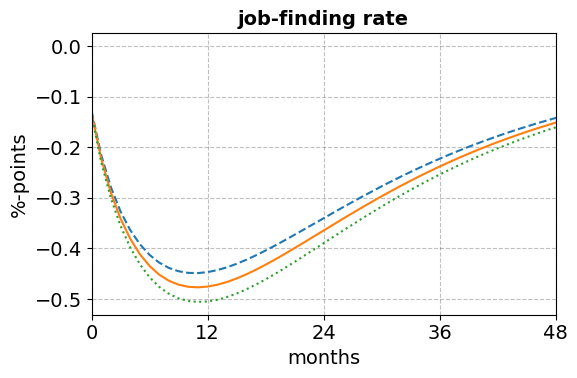

baseline: xi = 0.0200
xi =  0.8000
xi =  1.0000
xi =  1.2000
completed in 10.2 secs


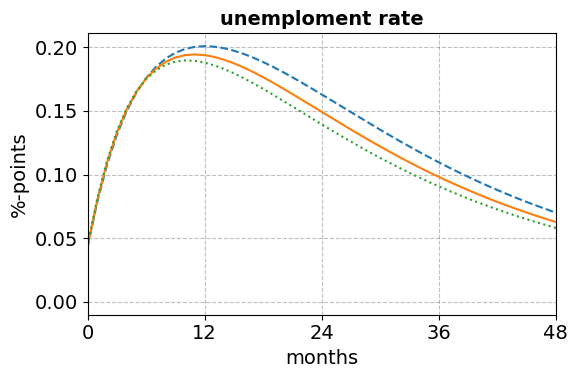

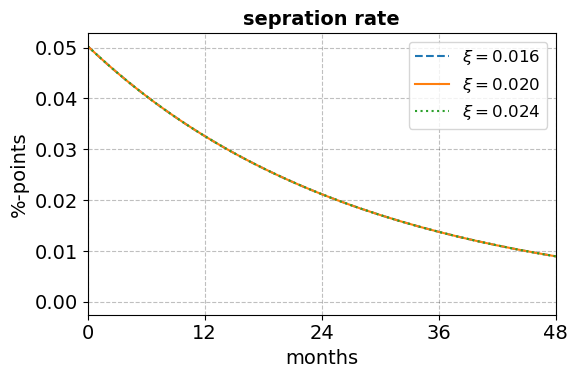

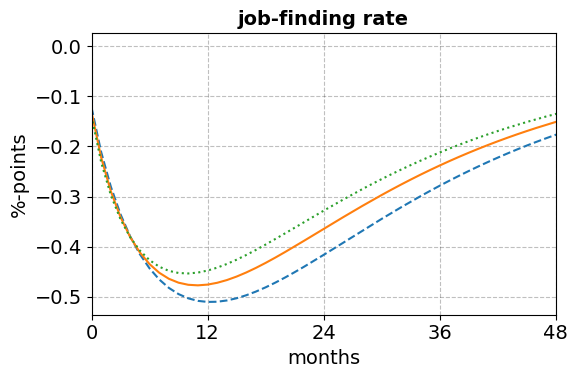

baseline: w_ss = 0.6591
w_ss =  0.9000
w_ss =  1.0000
w_ss =  1.1000
completed in 9.7 secs


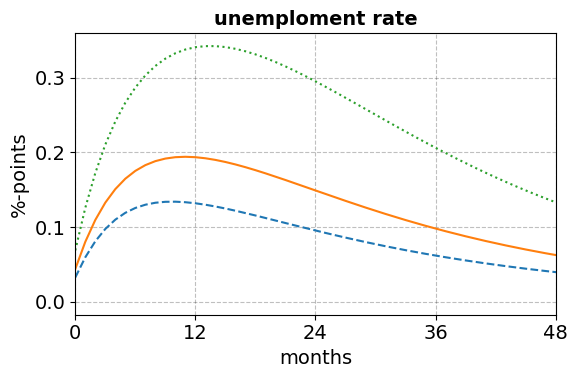

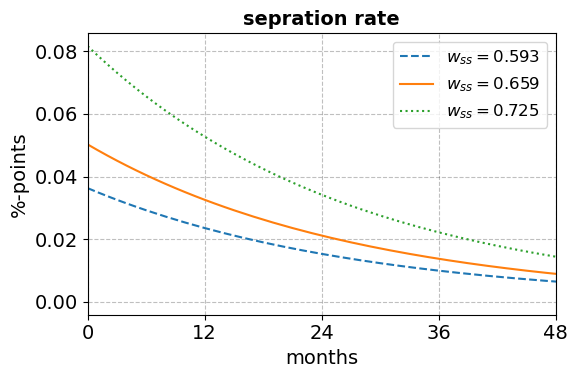

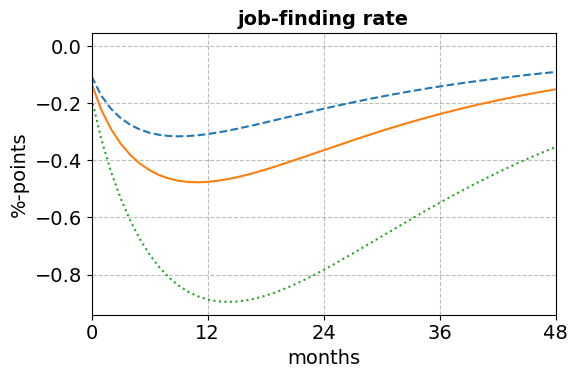

In [16]:
shock_specs={'px':model.path.px[0,:],'shock_TFP':model.path.shock_TFP[0,:]}
for parname,labelname in [('psi','\psi'),('xi','\\xi'),('w_ss','w_{{ss}}')]:
    
    if parname == 'xi':
        facs = [0.8,1.0,1.2]
    else:
        facs = [0.9,1.0,1.1]
        
    models = vary_par(SAM,parname,facs,skip_hh=True,shock_specs=shock_specs,fac=True,do_print=True)
                          
    labels = [f'${labelname} = {model_.par.__dict__[parname]:.3f}$' for model_ in models]
    lss = ['--','-',':']

    for varname,title in [('u','unemploment rate'),('delta','sepration rate'),('lambda_u','job-finding rate')]:
        IRF_figs(models,labels,lss,colors,title,'SAM',parname,varname,legend=varname=='delta',T_max=48)
    
    plt.show()

# HtM

In [17]:
model_HtM = model.copy(name='HtM')
model_HtM.par.HtM_share = 1/3
model_HtM.par.PIH_share = 1/3

model_HtM.par.beta_shares = np.array([model_HtM.par.HtM_share,0.0,model_HtM.par.PIH_share])
model_HtM.par.beta_shares[1] = 1-np.sum(model_HtM.par.beta_shares)
model_HtM.par.beta_grid[0] = 0.0
model_HtM.par.beta_grid[-1] = 0.98**(1/12)

In [18]:
model_HtM.find_ss(do_print=True)

guess:
     R =   0.97668498 -> B-A_hh =   0.65264927
find bracket to search in:
  0: R =   0.97793498 -> B-A_hh =   0.64912421
  1: R =   0.98980998 -> B-A_hh =   0.57665398
  2: R =   0.99574748 -> B-A_hh =   0.43722316
  3: R =   0.99871623 -> B-A_hh =   0.24054361
  4: R =   1.00020060 -> B-A_hh =   0.01963888
  5: R =   1.00094279 -> B-A_hh =  -0.21274394
brentq:
  0: R =   1.00026332 -> B-A_hh =   0.00551211
  1: R =   1.00028718 -> B-A_hh =  -0.00003722
  2: R =   1.00028702 -> B-A_hh =   0.00000036
  3: R =   1.00028702 -> B-A_hh =   0.00000000
  4: R =   1.00028702 -> B-A_hh =  -0.00000000

R =   1.00028702

steady state found in 22.5 secs


In [19]:
model_HtM.compute_jacs(skip_shocks=True)

In [20]:
model_HtM.find_transition_path()

In [21]:
def calc_Cs(model,i_fix=None):
    
    if i_fix is None:
        i = 0
        j = par.Nfix
    else:
        i = i_fix
        j = i + 1
    
    ss = model.ss
    
    C_e = np.sum(ss.D[i:j,0,:]*ss.c[i:j,0,:])/np.sum(ss.D[i:j,0,:])
    C_u = np.sum(ss.D[i:j,1:,:]*ss.c[i:j,1:,:])/np.sum(ss.D[i:j,1:,:])

    C_u_dur = np.zeros(par.Nz-2)
    for i_u in range(1,par.Nz-1):
        C_u_dur[i_u-1] = np.sum(ss.D[i:j,i_u,:]*ss.c[i:j,i_u,:])/np.sum(ss.D[i:j,i_u,:])
    
    return C_e,C_u,C_u_dur

baseline:
drop: -19.2
drop at exhausation: 34.7

HtM:
drop: -19.2
at exhausation: 46.5


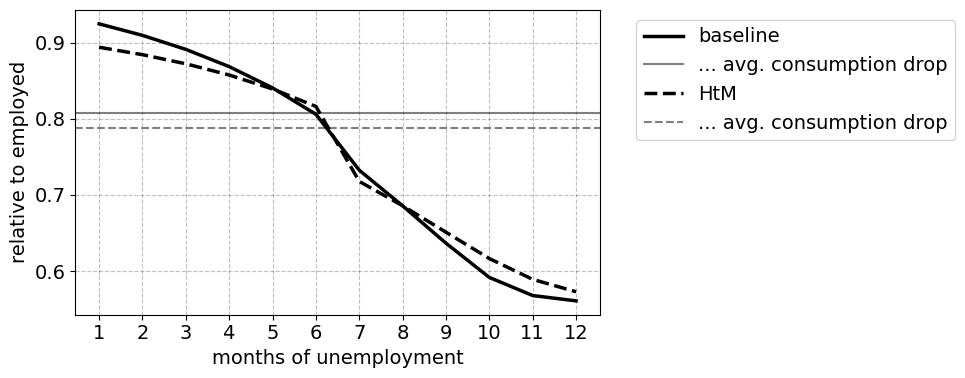

In [22]:
fig,ax = create_fig(figsize=(10,6/1.5))  

# baseline
C_e,C_u,C_u_dur = calc_Cs(model)
ax.plot(np.arange(1,par.Nz-1),C_u_dur/C_e,ls='-',lw=2.5,color='black',
        label=f'baseline')

ax.axhline(C_u/C_e,ls='-',color='black',alpha=0.50,label='... avg. consumption drop')

C_drop_ex = (C_u_dur[5]-C_u_dur[6])/((1-ss.tau)*(ss.phi_obar-par.phi_ubar)*ss.w)*100
print(f'baseline:')
print(f'drop: {model.moms["C_drop_ss"]:.1f}')
print(f'drop at exhausation: {C_drop_ex:.1f}')
print('')
      
# HtM
C_e,C_u,C_u_dur = calc_Cs(model_HtM)
ax.plot(np.arange(1,par.Nz-1),C_u_dur/C_e,ls='--',lw=2.5,color='black',label=f'HtM')
ax.axhline(C_u/C_e,ls='--',color='black',alpha=0.50,label='... avg. consumption drop')

C_drop_ex = (C_u_dur[5]-C_u_dur[6])/((1-ss.tau)*(ss.phi_obar-par.phi_ubar)*ss.w)*100
print(f'HtM:')
print(f'drop: {model_HtM.moms["C_drop_ss"]:.1f}')
print(f'at exhausation: {C_drop_ex:.1f}')

# details
ax.set_xticks(np.arange(1,par.Nz-1));
ax.set_xlabel('months of unemployment')
ax.set_ylabel('relative to employed')
lgd = ax.legend(frameon=True,ncol=1,bbox_to_anchor=(1.05,1), loc='upper left',)

fig.tight_layout()
fig.savefig('results/c_upon_u.pdf')

# Debt

In [23]:
model_debt = model.copy(name='debt')
model_debt.par.omega = 0.10
model_debt.compute_jacs(skip_hh=True,skip_shocks=True)
model_debt.find_transition_path()

In [24]:
model_HtM_debt = model_HtM.copy(name='HtM+debt')
model_HtM_debt.par.omega = 0.10
model_HtM_debt.compute_jacs(skip_hh=True,skip_shocks=True)
model_HtM_debt.find_transition_path()

In [25]:
with open(f'saved/par_calibration_HtM_debt.p', 'wb') as f:
    pickle.dump(model_HtM_debt.par.__dict__, f)

# IRFs

In [26]:
for model_ in [model,SAM,model_HtM,model_debt,model_HtM_debt]:
    model_.calc_calib_moms()
    print(f'{model_.name:10s}: {model_.moms["var_u"]:.2f}')

baseline  : 1.37
SAM       : 1.00
HtM       : 1.21
debt      : 1.11
HtM+debt  : 0.90


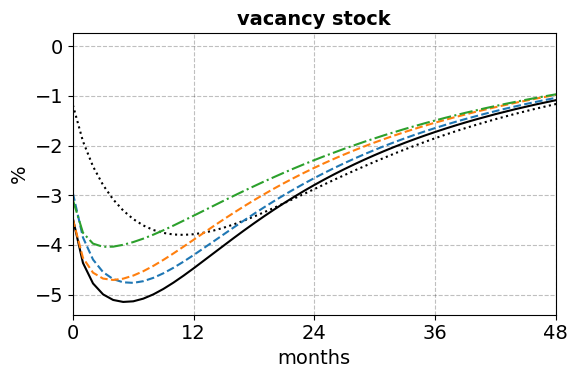

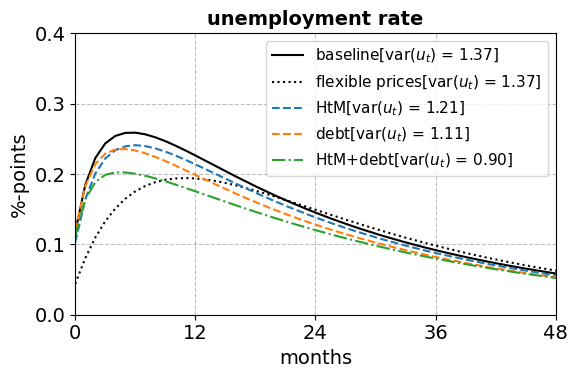

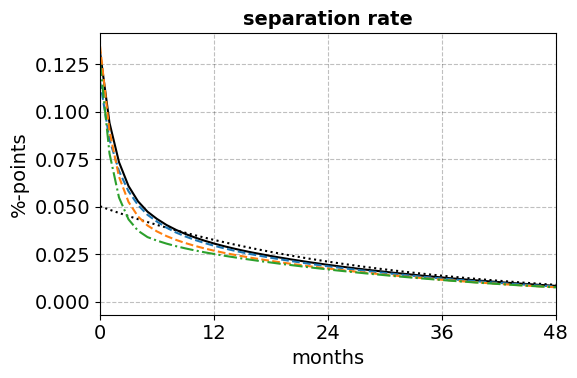

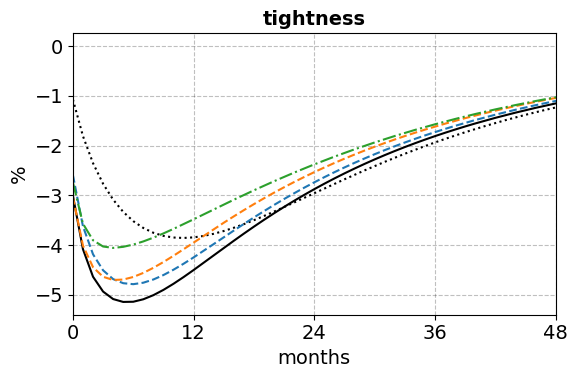

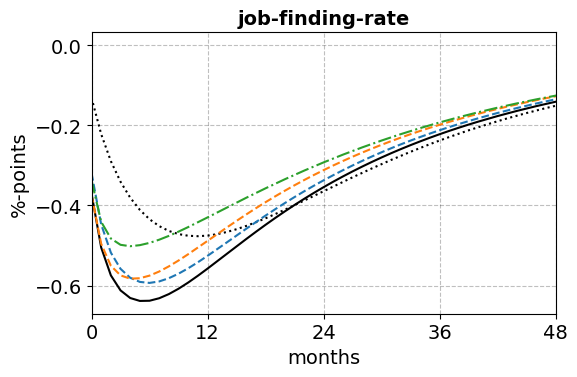

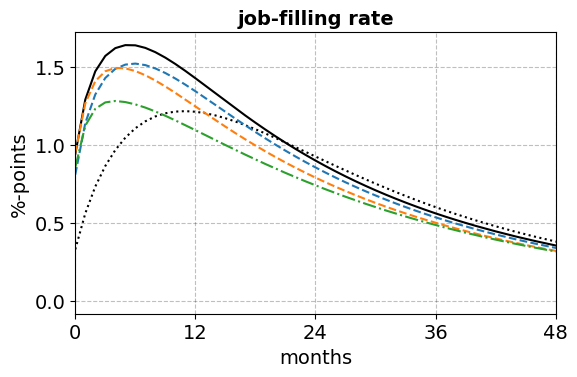

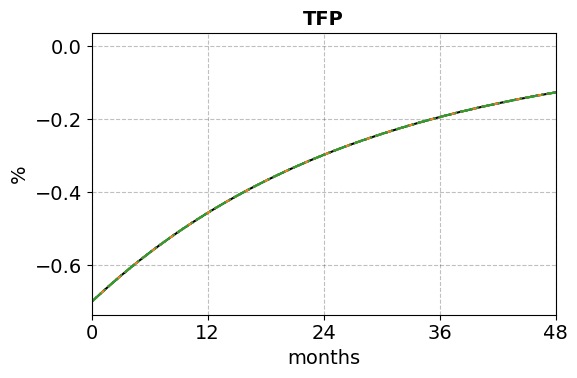

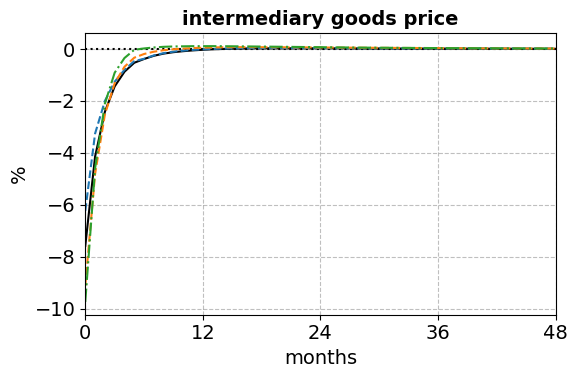

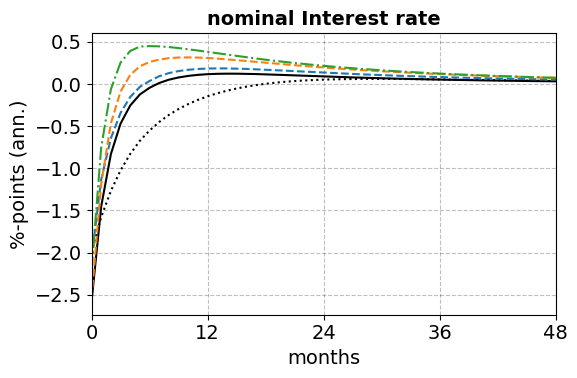

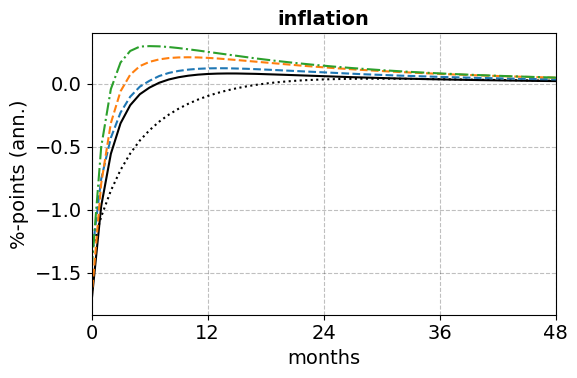

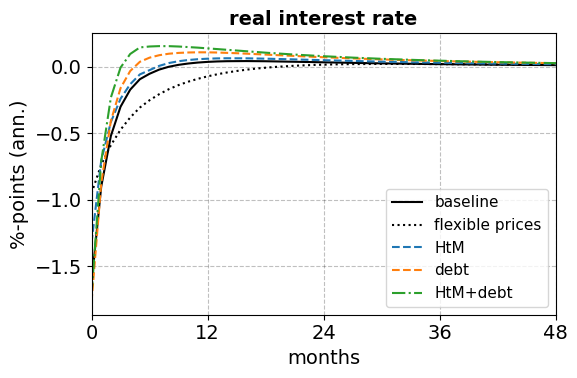

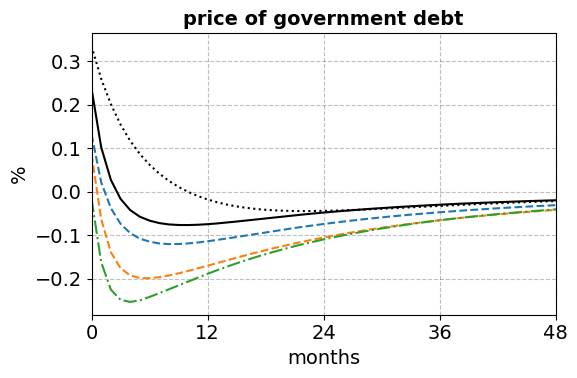

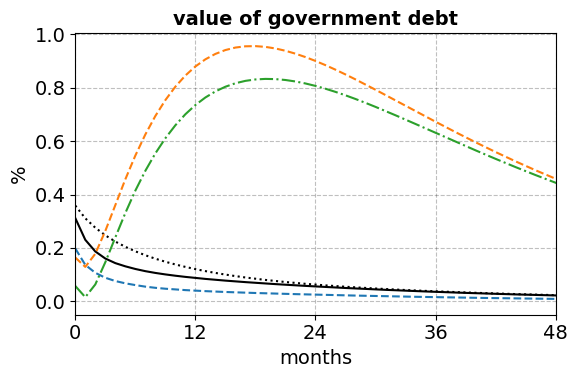

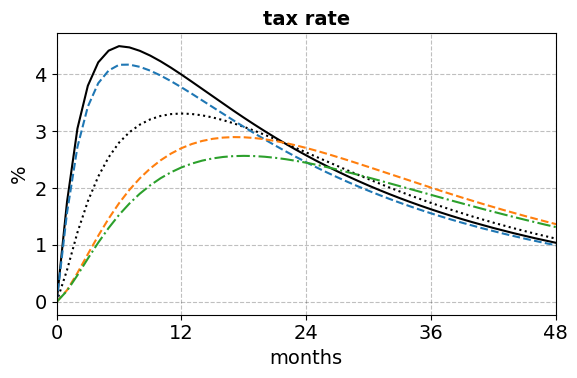

In [27]:
T_max = 48

for varname,title in varlist:

    fig,ax = create_fig()

    for model_,label,color,ls in [(model,'baseline','black','-'),
             (model_flex,'flexible prices','black',':'),
             (model_HtM,'HtM',colors[0],'--'),
             (model_debt,'debt',colors[1],'--'),
             (model_HtM_debt,'HtM+debt',colors[2],'-.')]:
    
        if varname == 'u':
            var_u = model_.moms['var_u']
            var_u_label = f'[var($u_t$) = {var_u:.2f}]'
        else:
            var_u_label = ''
        
        IRF,ylabel = model_.get_IRF(varname) 
        ax.plot(IRF,label=f'{label}{var_u_label}',color=color,ls=ls)
    
    do_legend = (varname == 'u') or (varname == 'RealR')
    if varname == 'u':
        ax.set_ylim([0,0.40])
    if do_legend: ax.legend(frameon=True,fontsize=11)
    save_fig(fig,ax,f'IRF_all_{varname}',title=title,ylabel=ylabel)
    
    plt.show()

# Bond demand and supply

In [28]:
def add_rel_to_ss(path,ss):
    
    path.dA_hh = (path.A_hh[0,:]/ss.A_hh-1)*100
    path.dC_hh = (path.C_hh[0,:]/ss.C_hh-1)*100
    path.dY_hh = (path.Y_hh[0,:]/ss.Y_hh-1)*100
    path.du = (np.sum(path.D[:,:,1:,:],axis=(1,2,3))-ss.u)*100
    

In [29]:
def get_equivalent_w(path,ss):
             
        U_UI_hh = path.U_UI_hh[0,:]
        u = path.u[0,:]
        phi_obar = path.phi_obar[0,:]

        term_a = (1-u)+phi_obar*U_UI_hh+par.phi_ubar*(u-U_UI_hh)
        term_b = (1-ss.u)+ss.phi_obar*ss.U_UI_hh+par.phi_ubar*(ss.u-ss.U_UI_hh)
        w = model.ss.w*term_a/term_b
        
        UI = phi_obar*w*U_UI_hh + par.phi_ubar*w*(u-U_UI_hh)
        Yt_hh = w*(1-u) + UI
        diff_Yt_hh = path.Yt_hh[0,:] - Yt_hh
        np.allclose(diff_Yt_hh,0.0)

        return w

In [30]:
paths = {}
for model_ in [model,model_HtM]:
    
    print(f'{model_.name}')
    for varname in ['C_hh','A_hh']:
        for use_inputs,fix_z_trans in [(('lambda_u','delta'),False),(('delta',),False),(('lambda_u',),False),(('w',),False),(('lambda_u','delta'),True),(('lambda_u','delta','w'),True)]:
            
            key = (model_.name,use_inputs,fix_z_trans)
            
            custom_paths = {}
            for inputname in use_inputs:
                
                if inputname == 'w':
                    custom_paths['w'] = get_equivalent_w(path,ss)
                else:
                    custom_paths[inputname] = model.path.__dict__[inputname][0,:]
            
            path_ = paths[key] = model_.decompose_hh_path(
                do_print=False,use_inputs=use_inputs,custom_paths=custom_paths,fix_z_trans=fix_z_trans)         
            
            add_rel_to_ss(path_,model_.ss)
        

baseline
HtM


## EU vs UE + HtM

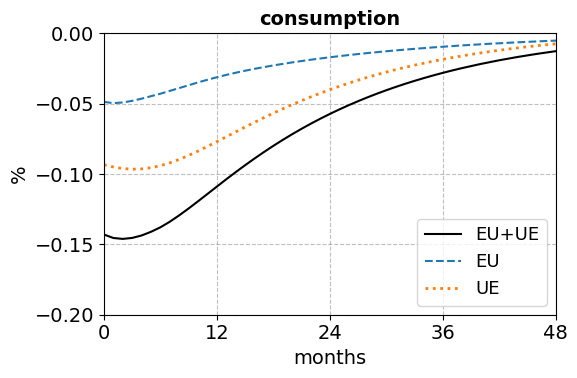

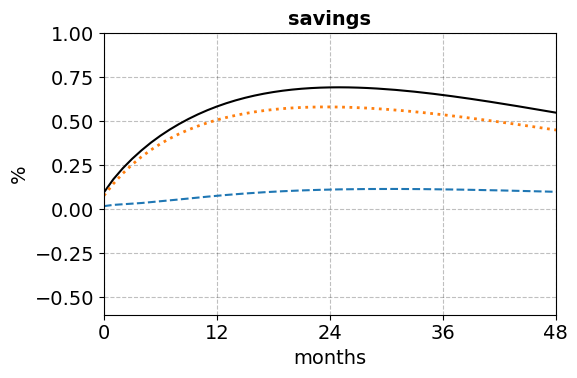

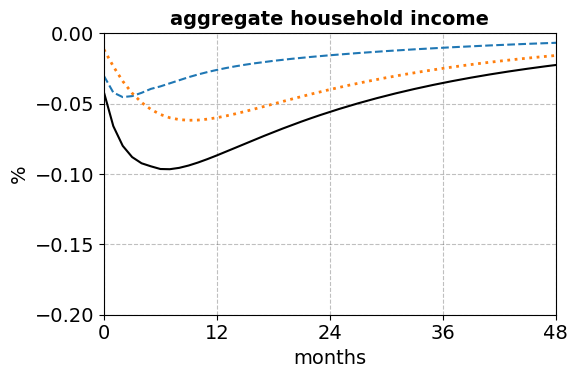

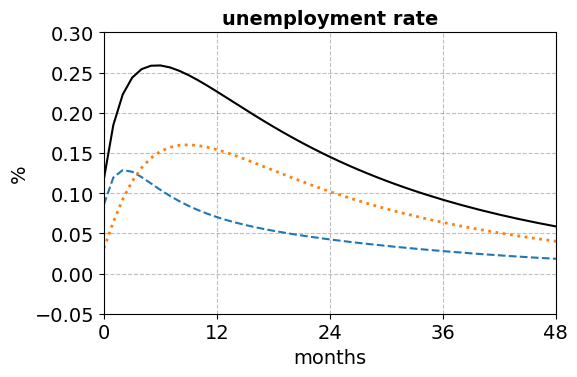

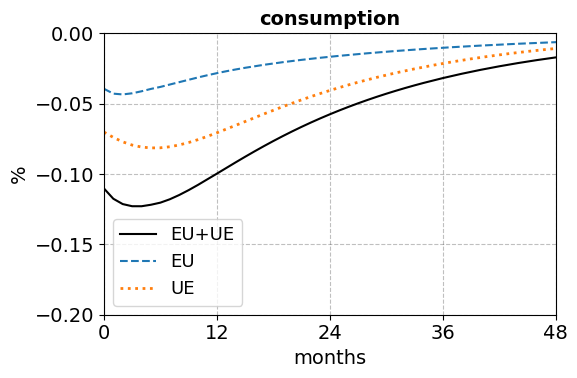

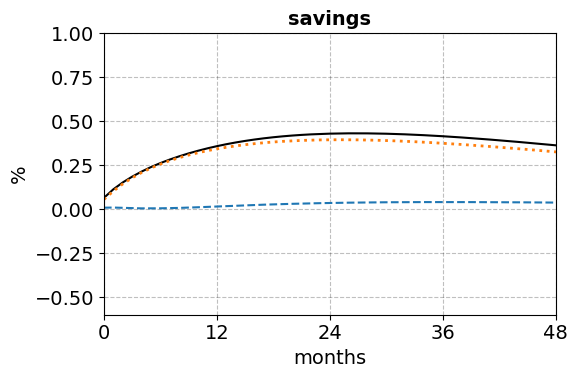

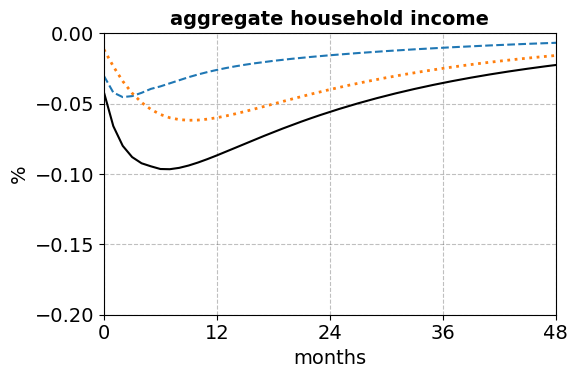

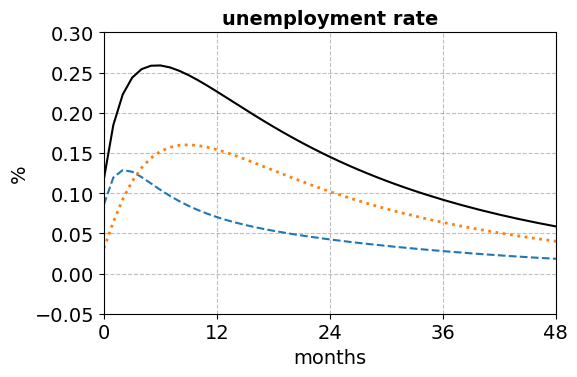

In [31]:
for model_ in [model,model_HtM]:
    
    for varname,title in [('dC_hh','consumption'),('dA_hh','savings'),('dY_hh','aggregate household income'),('du','unemployment rate')]:

        fig,ax = create_fig()

        path_ = paths[(model_.name,('lambda_u','delta'),False)]
        ax.plot(path_.__dict__[varname],label='EU+UE',color='black',ls='-')

        path_ = paths[(model_.name,('delta',),False)]
        ax.plot(path_.__dict__[varname],label='EU',color=colors[0],ls='--')

        path_ = paths[(model_.name,('lambda_u',),False)]
        ax.plot(path_.__dict__[varname],label='UE',color=colors[1],ls=':',lw=2)

        if varname == 'dC_hh': ax.legend(frameon=True,ncol=1,fontsize=13)

        if varname in ['dC_hh','dY_hh']:
            ax.set_ylim([-0.2,0.00])
            ylabel='%'
        elif varname in ['dA_hh']:
            ax.set_ylim([-0.6,1.0])
            ylabel='%'
        elif varname in ['du']:
            ax.set_ylim([-0.05,0.3])
            ylabel='%-points'
            
        save_fig(fig,ax,f'bond_demand_EU_vs_UE_{model_.name}_{varname}',title=title,ylabel='%')
        plt.show()


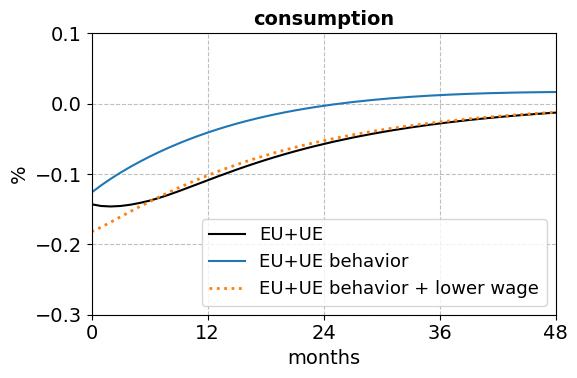

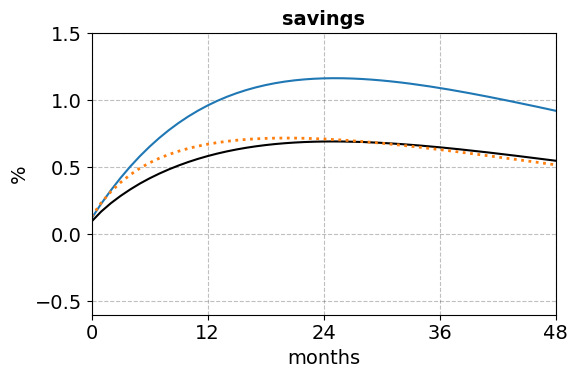

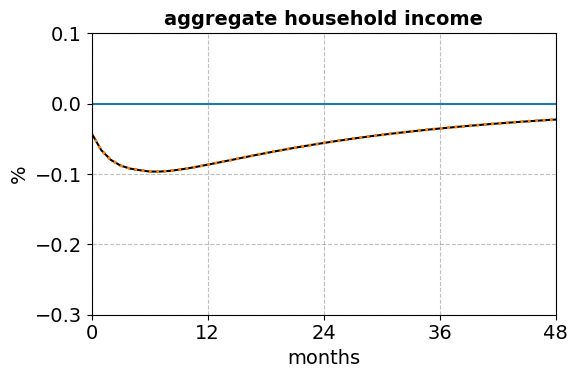

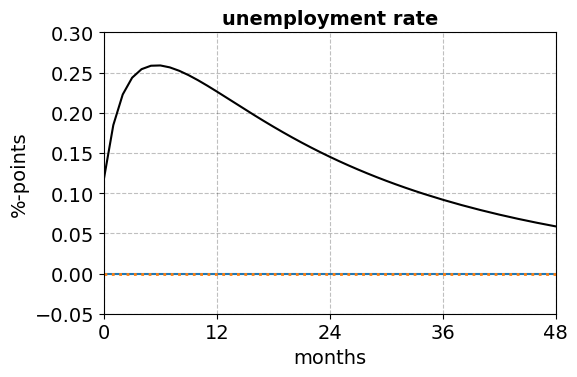

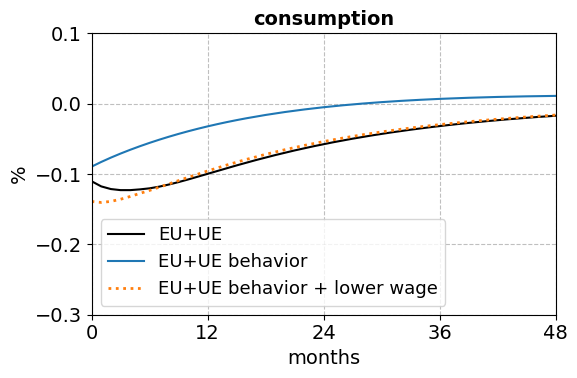

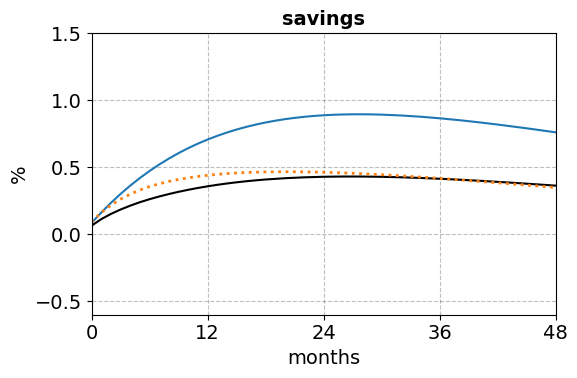

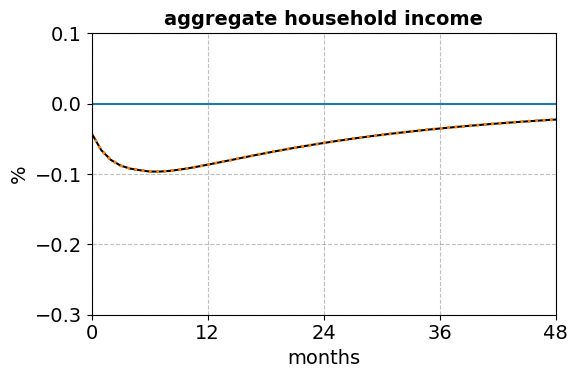

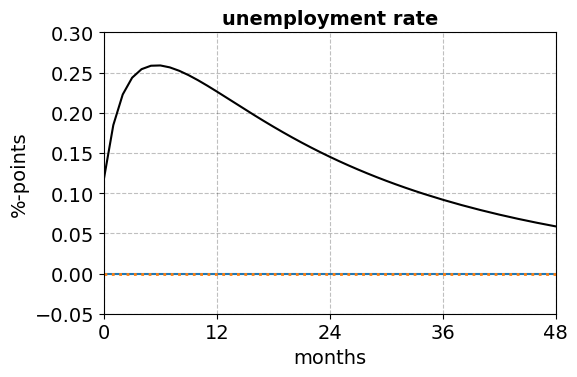

In [32]:
for model_ in [model,model_HtM]:
    
    for varname,title in [('dC_hh','consumption'),('dA_hh','savings'),('dY_hh','aggregate household income'),('du','unemployment rate')]:

        fig,ax = create_fig()

        path_ = paths[(model_.name,('lambda_u','delta'),False)]
        ax.plot(path_.__dict__[varname],label='EU+UE',color='black',ls='-')
        
        path_ = paths[(model_.name,('lambda_u','delta'),True)]
        ax.plot(path_.__dict__[varname],label='EU+UE behavior',ls='-')

        path_ = paths[(model_.name,('lambda_u','delta','w'),True)]
        ax.plot(path_.__dict__[varname],label='EU+UE behavior + lower wage',ls=':',lw=2)
        
        if varname == 'dC_hh': ax.legend(frameon=True,ncol=1,fontsize=13)

        if varname in ['dC_hh','dY_hh']:
            ax.set_ylim([-0.3,0.1])
            ylabel='%'
        elif varname in ['dA_hh']:
            ax.set_ylim([-0.6,1.5])
            ylabel='%'
        elif varname in ['du']:
            ax.set_ylim([-0.05,0.3])
            ylabel='%-points'

        save_fig(fig,ax,f'bond_demand_behavior_{model_.name}_{varname}',title=title,ylabel=ylabel)
        plt.show()


## Only employed changes behavior

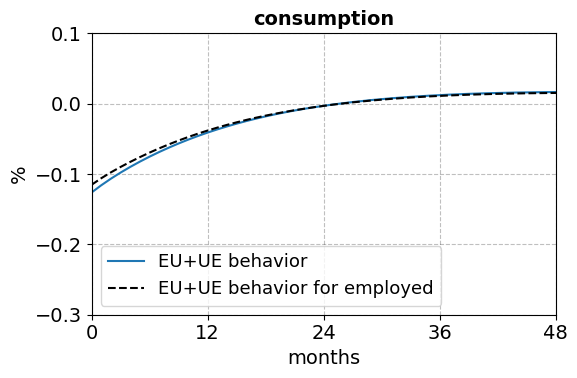

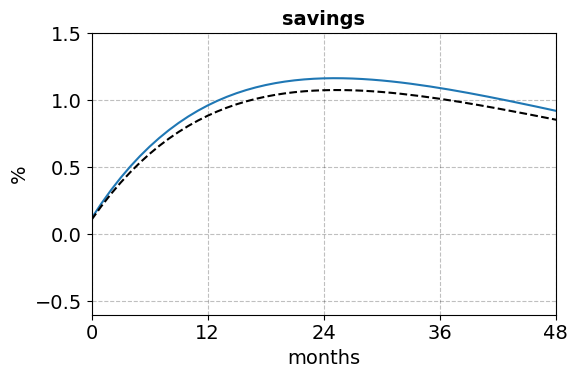

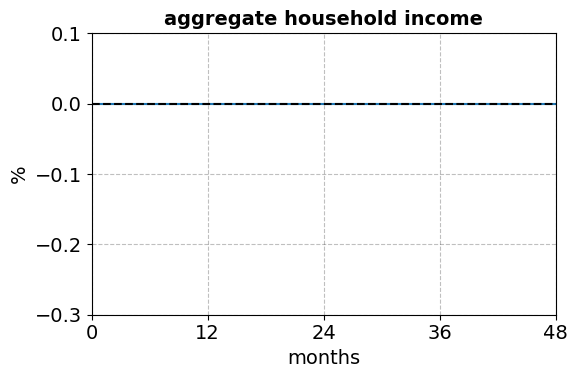

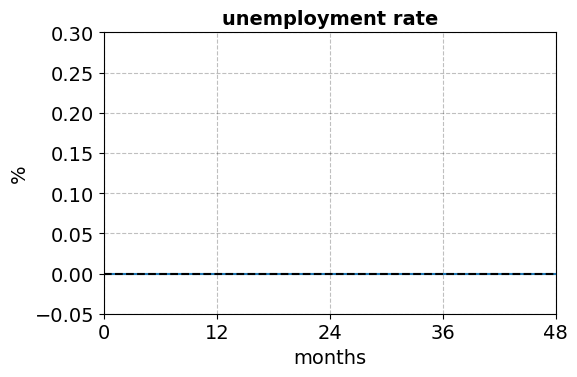

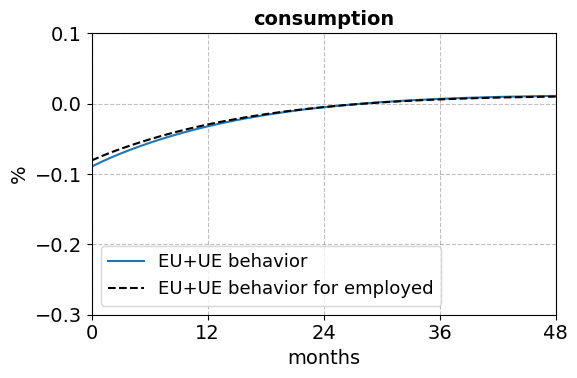

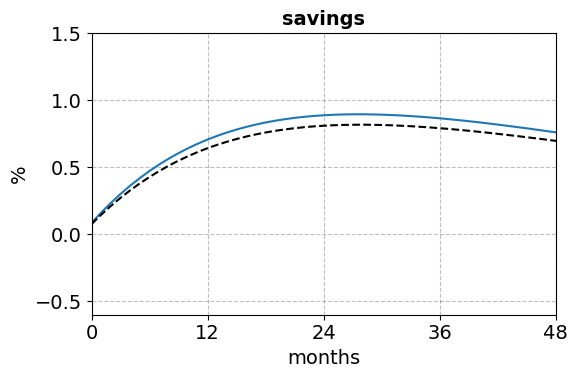

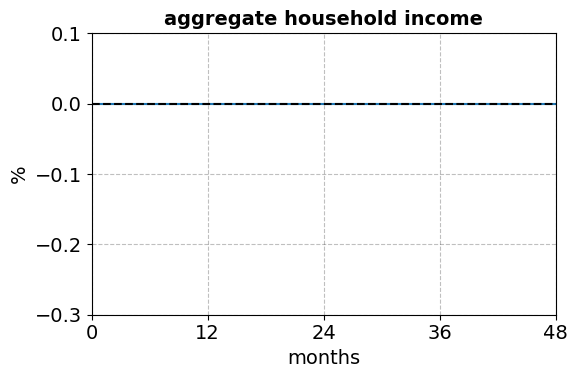

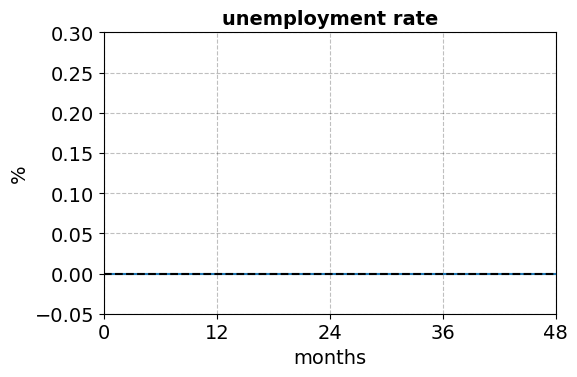

In [33]:
for model_ in [model,model_HtM]:
        
    # a. calculations
    path_ = paths[(model_.name,('lambda_u','delta'),True)]

    model__ = model_.copy()
    
    model__.path.RealR_ex_post[0,:] = model_.ss.RealR_ex_post
    model__.path.tau[0,:] = model_.ss.tau
    model__.path.lambda_u[0,:] = model_.ss.lambda_u
    model__.path.delta[0,:] = model_.ss.delta

    model__.path.a = path_.a.copy()
    model__.path.c = path_.c.copy()
    model__.path.y = path_.y.copy()
    model__.path.a[:,:,1:,:] = model_.ss.a[:,1:,:]
    model__.path.c[:,:,1:,:] = model_.ss.c[:,1:,:]

    model__.simulate_hh_path(find_i_and_w=True)    
    add_rel_to_ss(model__.path,model__.ss)
    
    # b. figure
    for varname,title in [('dC_hh','consumption'),('dA_hh','savings'),('dY_hh','aggregate household income'),('du','unemployment rate')]:

        fig,ax = create_fig()

        ax.plot(path_.__dict__[varname],label='EU+UE behavior',ls='-')
        ax.plot(model__.path.__dict__[varname],label='EU+UE behavior for employed',color='black',ls='--')

        if varname == 'dC_hh': ax.legend(frameon=True,ncol=1,fontsize=13)

        if varname in ['dC_hh','dY_hh']:
            ax.set_ylim([-0.3,0.1])
            ylabel='%'
        elif varname in ['dA_hh']:
            ax.set_ylim([-0.6,1.5])
            ylabel='%'
        elif varname in ['du']:
            ax.set_ylim([-0.05,0.3])
            ylabel='%-points'
            
        save_fig(fig,ax,f'bond_demand_behavior_emp_{model_.name}_{varname}',title=title,ylabel='%')
        plt.show()
    

# MPCs

In [34]:
model.find_ss()

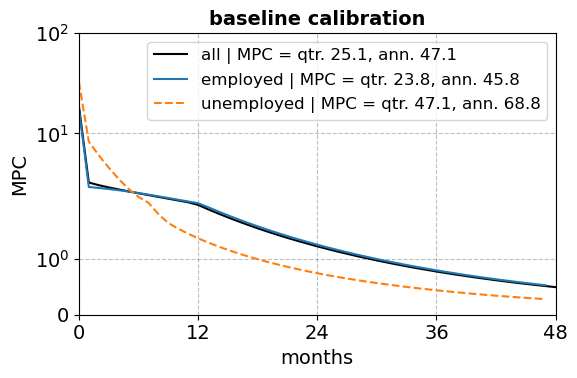

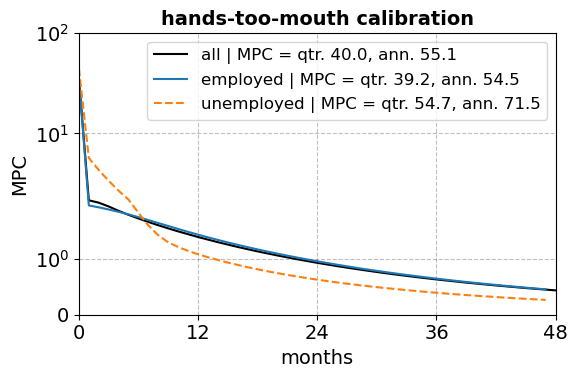

In [35]:
for model_,title in [(model,'baseline calibration'),(model_HtM,'hands-too-mouth calibration')]:

    # a. path
    transfer_ss = model_.ss.transfer
    dy = 0.01*model_.ss.w
    custom_paths = {'transfer':transfer_ss*np.ones(par.T)}
    custom_paths['transfer'][0] += dy
    
    # b. unemployed
    Dbeg_u = model_.ss.Dbeg.copy()
    Dbeg_u[:,0,:] = 0.0
    Du = np.sum(Dbeg_u)
    Dbeg_u /= Du

    path_u_base = model.decompose_hh_path(do_print=False,Dbeg=Dbeg_u,use_inputs=[],custom_paths=custom_paths);
    path_u = model.decompose_hh_path(do_print=False,Dbeg=Dbeg_u,use_inputs=['transfer'],custom_paths=custom_paths);

    MPC_u = (path_u.C_hh[0,:]-path_u_base.C_hh[0,:])/dy
    MPC_u_qtr = np.sum(path_u.C_hh[0,:3]-path_u_base.C_hh[0,:3])/dy
    MPC_u_ann = np.sum(path_u.C_hh[0,:12]-path_u_base.C_hh[0,:12])/dy
    
    # c. employed
    Dbeg_e = model_.ss.Dbeg.copy()
    Dbeg_e[:,1:,:] = 0.0
    Dbeg_e /= np.sum(Dbeg_e)

    path_e_base = model.decompose_hh_path(do_print=False,Dbeg=Dbeg_e,use_inputs=[],custom_paths=custom_paths);
    path_e = model.decompose_hh_path(do_print=False,Dbeg=Dbeg_e,use_inputs=['transfer'],custom_paths=custom_paths);

    MPC_e = (path_e.C_hh[0,:]-path_e_base.C_hh[0,:])/dy
    MPC_e_qtr = np.sum(path_e.C_hh[0,:3]-path_e_base.C_hh[0,:3])/dy
    MPC_e_ann = np.sum(path_e.C_hh[0,:12]-path_e_base.C_hh[0,:12])/dy
    
    # d. total
    path_all = model_.decompose_hh_path(do_print=False,use_inputs=['transfer'],custom_paths=custom_paths);
    MPC_all = (path_all.C_hh[0,:]-model_.ss.C_hh)/dy
    MPC_all_qtr = np.sum(path_all.C_hh[0,:3]-ss.C_hh)/dy
    MPC_all_ann = np.sum(path_all.C_hh[0,:12]-ss.C_hh)/dy
    
    # e. figure
    fig,ax = create_fig()
    
    ax.plot(MPC_all*100,label=f'all | MPC = qtr. {MPC_all_qtr*100:.1f}, ann. {MPC_all_ann*100:.1f}',color='black')
    ax.plot(MPC_e[:48]*100,label=f'employed | MPC = qtr. {MPC_e_qtr*100:.1f}, ann. {MPC_e_ann*100:.1f}',ls='-')
    ax.plot(MPC_u[:48]*100,label=f'unemployed | MPC = qtr. {MPC_u_qtr*100:.1f}, ann. {MPC_u_ann*100:.1f}',ls='--')

    ax.set_ylim([0,100])
    ax.set_yscale('symlog')
    save_fig(fig,ax,f'{model_.name}_MPC',title=f'{title}',legend=True,ylabel='MPC')
        
    plt.show()

## Bond supply

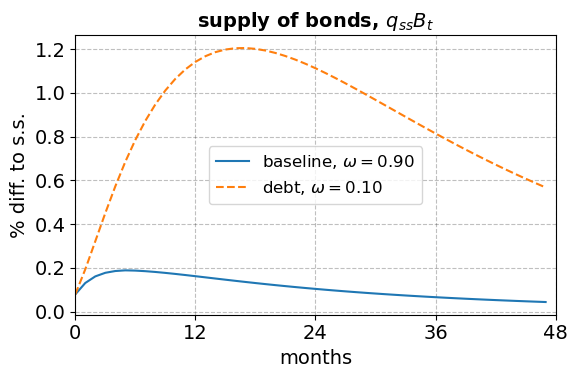

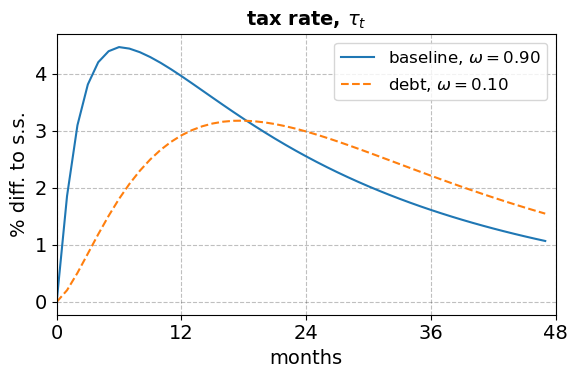

In [36]:
fig,ax = create_fig()
fig_tau,ax_tau = create_fig()

for model_,label,ls in [
    (model,f'baseline, $\omega = {model.par.omega:.2f}$','-'),
    (model_debt,f'debt, $\omega = {model_debt.par.omega:.2f}$','--')
]:
        
    tau = np.zeros(par.T)
    B = np.zeros(par.T)

    B_lag = ss.B
    for t in range(par.T):
        tau[t] = model_.ss.tau + model_.par.omega*model_.ss.q*(B_lag-model_.ss.B)/model_.ss.Yt_hh
        B[t] = ((1+model_.par.delta_q*model_.ss.q)*B_lag+model.path.UI[0,t]-tau[t]*model.path.Yt_hh[0,t])/model_.ss.q
        B_lag = B[t]

    ax.plot((model_.ss.q*B[:T_max]/model_.ss.qB-1)*100,label=label,ls=ls)
    ax_tau.plot((tau[:T_max]/model_.ss.tau-1)*100,label=label,ls=ls)

save_fig(fig,ax,'bond_supply',title='supply of bonds, $q_{ss}B_t$',ylabel='% diff. to s.s.',legend=True)
save_fig(fig_tau,ax_tau,'tax_rate',title='tax rate, $\\tau_t$',ylabel='% diff. to s.s.',legend=True)